In [277]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.integrate as integrate

from IPython.display import display, Math

In [278]:
G = 9.8
L1,L2 = 1.0, 1.0
G_L1 = G/L1
lam = L2/L1   #杆长度比L2/L1
mu = 1.0      #质量比M2/M1
M = 1+mu

# 生成时间
dt = 0.01
t = np.arange(0, 20, dt)

th1,th2 = 120.0, -10.0  #初始角度
om1,om2 = 0.0, 0.00       #初始角速度
state = np.radians([th1, om1, th2, om2])


def derivs(state, t):
    dydx = np.zeros_like(state)
    th1,om1,th2,om2 = state
    dydx[0] = state[1]
    delta = state[2] - state[0]
    cDelta, sDelta = np.cos(delta), np.sin(delta)
    sTh1,_,sTh2,_ = np.sin(state)
    den1 = M - mu*cDelta**2
    dydx[1] = (mu * om1**2 * sDelta * cDelta
                + mu * G_L1 * sTh2 * cDelta
                + mu * lam * om2**2 * sDelta
                - M * G_L1 * sTh1)/ den1
    dydx[2] = state[3]
    den2 = lam * den1
    dydx[3] = (- mu * lam * om2**2 * sDelta * cDelta
                + M * G_L1 * sTh1 * cDelta
                - M * om1**2 * sDelta
                - M * G_L1 * sTh2)/ den2
    return dydx

y = integrate.odeint(derivs, state, t)#0,1,2,3分别对应（theta1,omega1,theta2,omega2)

# 真实坐标
x1 = L1*np.sin(y[:, 0])
y1 = -L1*np.cos(y[:, 0])
x2 = L2*np.sin(y[:, 2]) + x1
y2 = -L2*np.cos(y[:, 2]) + y1


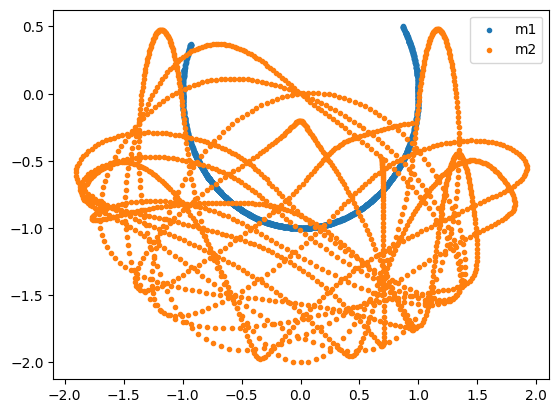

In [279]:
plt.scatter(x1,y1,marker='.', label='m1')
plt.scatter(x2,y2,marker='.', label='m2')

plt.legend()
plt.show()


In [280]:
#尝试从该轨迹中导出线性守恒量
N_s = np.shape(t) #假设得到的样本量
eta = 0.05 #设定的测量相对误差

#加高斯噪声生成测量的结果
L1_s = np.ones(N_s)*L1+np.random.normal(0,eta**2*L1)
L2_s = np.ones(N_s)*L2+np.random.normal(0,eta**2*L2)
theta1_s = y[:,0]+np.random.normal(0,(eta*np.mean(y[:,0]))**2)
theta2_s = y[:,2]+np.random.normal(0,(eta*np.mean(y[:,2])**2))

dotL1_s = np.diff(L1_s, prepend=L1_s[0])
dotL2_s = np.diff(L2_s, prepend=L2_s[0])
dottheta1_s = np.diff(theta1_s, prepend=theta1_s[0])
dottheta2_s = np.diff(theta2_s, prepend=theta2_s[0])


Trajectory = (np.vstack((L1_s,L2_s,theta1_s,theta2_s,dotL1_s,dotL2_s,dottheta1_s,dottheta2_s)))
#最终得到的相空间

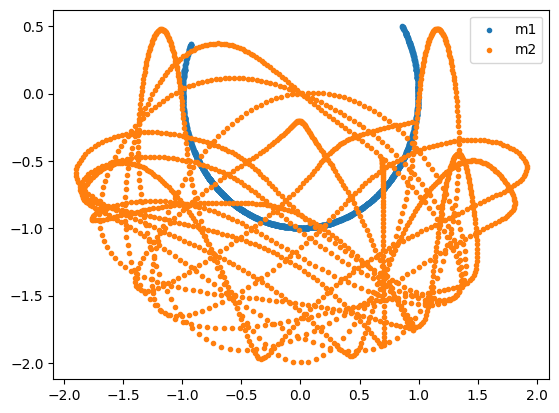

In [281]:
x1_s =L1_s*np.sin(theta1_s)
y1_s = -L1_s*np.cos(theta1_s)

x2_s = x1_s+L2_s*np.sin(theta2_s)
y2_s = y1_s-L2_s*np.cos(theta2_s)

plt.scatter(x1_s,y1_s,marker='.', label='m1')
plt.scatter(x2_s,y2_s,marker='.', label='m2')

plt.legend()
plt.show()


In [282]:
# 进行PCA分析
for i in range(np.shape(Trajectory)[0]):
    Trajectory[i] = Trajectory[i]-np.mean(Trajectory[i]) #去平均
    
Sigma = np.cov(Trajectory) #算协方差矩阵

lams,U = np.linalg.eig(Sigma) #特征值分解

sorted_indices = np.argsort(lams)[::-1]  # 从大到小排序
lams = lams[sorted_indices]
U = U[:, sorted_indices]

lam_max = lams[0]

display(Math(r'$(L_1,L_2,\theta_1,\theta_2,\dot{L}_1,\dot{L}_2,\dot{\theta}_1,\dot{\theta}_2)$'))
for i in range(len(lams)):
    if np.abs(lams[i]) == 0:
        print(f'经PCA，认为{U[:,i]}方向为线性守恒量对应直线方向')

<IPython.core.display.Math object>

经PCA，认为[0. 0. 0. 0. 0. 1. 0. 0.]方向为线性守恒量对应直线方向
经PCA，认为[0. 0. 0. 0. 1. 0. 0. 0.]方向为线性守恒量对应直线方向
经PCA，认为[0. 1. 0. 0. 0. 0. 0. 0.]方向为线性守恒量对应直线方向
经PCA，认为[1. 0. 0. 0. 0. 0. 0. 0.]方向为线性守恒量对应直线方向
